In [336]:
import numpy as np

In [337]:
gt=np.load("data.npy")    # 데이터를 받는다.
GT = gt                   # 받은 원본 데이터를 GT에 저장한다.
gt = list(gt) * 5         # gt를 5개 이어붙여서 길이를 5배로 늘린다.

def gen_data(func): 
    num_data= 50000       # 현재 함수에서 무작위로 추출할 횟수 > 표본의 수
    x= np.linspace(-99,100,200)
    
    """
    func 부분의 argment는 수정해도 무방합니다.
    """
    p= func(x)
    error= 1-np.sum(p)   
    
    if error<0.1 and error >= 0:    # 전체 확률이 1이 넘는지 검사
        p+=error/len(p)
    else:
        print("error:",error," p의 총합이 1이 안됩니다.")
        return -100
    
    s= np.random.choice(x,num_data,p=p,replace=True)    # p에서 num_data(50000번) 만큼 무작위로 추출 
    return s

def test(func):
    error=0
    sample_num =100
    for i in range(sample_num):
        error += np.mean(np.abs(np.sort(gt)-np.sort(gen_data(func)))) # 원본 데이터와 무작위로 추출한 데이터를 비교
    
    print("error:",error/sample_num)
    return error/sample_num


In [338]:
def func(x):
    global gt, GT
    d = {}    #  -99부터 200 까지 수의 빈도를 저장할 딕셔너리
    p = {}    #  빈도 수를 이용해서 만든 확률 딕셔너리
    
    for i in range(-99,101):   # -99부터 200 까지의 딕셔너리 초기화
        d[i] = 0
        
    for i in GT:               # 빈도수를 구하고
        d[i] = d[i]+1
      
    for i in range(-99,101):   # 빈도수로 확률을 구하고
        p[i] = d[i]/10000
    
    P = list(p.values())        # 딕셔너리의 key는 안쓰고 확률(value)로만 리스트를 만들어서 반환
    
    return P
    

In [339]:
s1=gen_data(func)

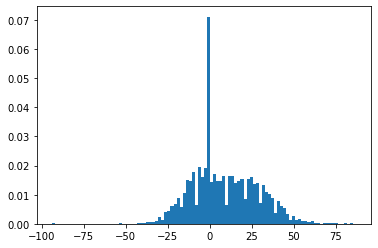

In [340]:
import matplotlib.pyplot as plt
plt.hist(s1,100,density=True)
plt.show()

In [341]:
test(func)

error: 0.11511519999999999


0.11511519999999999

In [342]:
'''
2017120097 이지우

'''

'\n2017120097 이지우\n\n'